## Plot ALL WROMY & Tilt Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from numpy import nan, nanmedian
from pathlib import Path
from obspy import UTCDateTime, Stream, read
from tqdm.notebook import tqdm_notebook
from datetime import datetime

from andbro__readYaml import __readYaml
from andbro__savefig import __savefig
from andbro__load_FURT_stream import __load_furt_stream
from andbro__load_WROMY_stream import __load_wromy_stream

# from andbro__logging_setup import __logging_setup

In [2]:
if os.uname().nodename == "lighthouse":
    root_path = "/home/andbro/"
    data_path = "/home/andbro/freenas/"
elif os.uname().nodename == "kilauea":
    root_path = "/home/brotzer/"
    data_path = "/import/kilauea-data/"
    archive_path = "/import/freenas-ffb-01-data/"

## Configurations

In [3]:
config = {}

# config['channel'] = "WS8"

config['stations'] = ["WS1","WS4","WS5","WS6","WS7","WS8","WS9"]

config['tbeg'] = UTCDateTime("2021-09-01")
config['tend'] = UTCDateTime("2023-05-31")

config['date_range']  = pd.date_range(config['tbeg'].date, config['tend'].date)

config['pathToData'] = f"{archive_path}romy_archive/"
# config['pathToData'] = f"/home/andbro/Downloads/tmp/wromy/"

config['pathToWromy'] = f"{data_path}wromy/"

## specify output directory for figures
config['output_figures'] = f"{root_path}Documents/ROMY/WROMY/figures/"

## specfiy path to data
config['datapath'] = f"{data_path}TiltmeterDataBackup/Tilt_downsampled/"

## correction of offset (e.g. reset mass)
offset_correction = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/", "tiltmeter_steps.yml")

## correction for temperature trend
temperature_correction = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/","temperature_correction.yml")


## Load Data

In [4]:
def __load_wromy_data(channel, path_to_data):
    
    from os import listdir
    from tqdm.notebook import tqdm
    
    files = listdir(path_to_data+channel)
    
    for n, file in enumerate(tqdm(files)):
        df0 = pd.read_pickle(path_to_data+channel+"/"+file)
        if n == 0:
            df_raw = df0
        else: 
            df_raw = pd.concat([df_raw,df0])
    df_raw.reset_index()
    return df_raw

### Load WROMY data

In [5]:
ws = []
for sta in config['stations']:
    print(sta)
    df0 = __load_wromy_data(sta,config['pathToWromy'])
    df0.dropna(inplace=True)
    df0.sort_values('TimeStamp', inplace=True)
    df0.reset_index(drop=True, inplace=True)

    ws.append(df0)

WS1


  0%|          | 0/517 [00:00<?, ?it/s]

WS4


  0%|          | 0/541 [00:00<?, ?it/s]

WS5


  0%|          | 0/547 [00:00<?, ?it/s]

WS6


  0%|          | 0/521 [00:00<?, ?it/s]

WS7


  0%|          | 0/550 [00:00<?, ?it/s]

WS8


  0%|          | 0/493 [00:00<?, ?it/s]

WS9


  0%|          | 0/538 [00:00<?, ?it/s]

In [6]:
# ws1 = __load_wromy_stream(config['pathToData'], "BW.WROMY..WS1", config['tbeg'], config['tend'])

In [7]:
# ws4 = __load_wromy_stream(config['pathToData'], "BW.WROMY..WS4", config['tbeg'], config['tend'])

In [8]:
# ws5 = __load_wromy_stream(config['pathToData'], "BW.WROMY..WS5", config['tbeg'], config['tend'])

In [9]:
# ws6 = __load_wromy_stream(config['pathToData'], "BW.WROMY..WS6", config['tbeg'], config['tend'])

In [10]:
# ws7 = __load_wromy_stream(config['pathToData'], "BW.WROMY..WS7", config['tbeg'], config['tend'])

In [11]:
# ws8 = __load_wromy_stream(config['pathToData'], "BW.WROMY..WS8", config['tbeg'], config['tend'])

In [12]:
# ws9 = __load_wromy_stream(config['pathToData'], "BW.WROMY..WS9", config['tbeg'], config['tend'])

### Load FURT data

In [13]:
# furt = __load_furt_stream(config)

In [14]:
FURT_raw = __load_wromy_data("FURT",config['pathToWromy']) 
furt = FURT_raw.copy()
furt.dropna(inplace=True)
furt.sort_values('TimeStamp', inplace=True)
furt.reset_index(drop=True, inplace=True)

  0%|          | 0/634 [00:00<?, ?it/s]

## Plotting

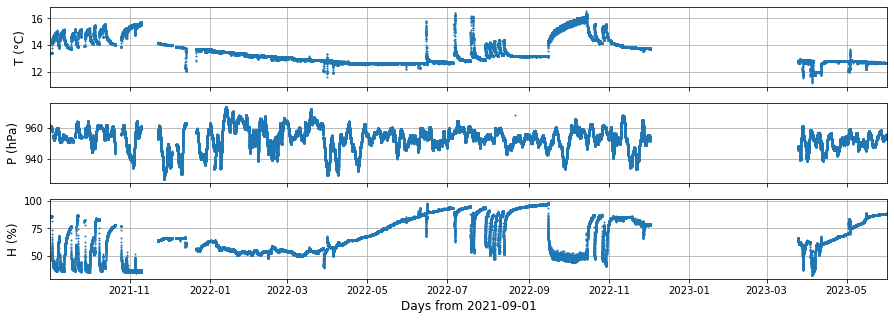

In [15]:
def __makeplot_station(df):
    
    NN = 3
    font = 12
    
    fig, ax = plt.subplots(NN,1, figsize=(15,5), sharex=True)
    
    xx = (df['totalSeconds'] - df['totalSeconds'][0])/86400
    xx = (df['TimeStamp'])

    ax[0].scatter(xx, df['Temperature (°C)'], s=1, zorder=2)    
    ax[1].scatter(xx, df['Pressure (hPa)'], s=1, zorder=2)
    ax[2].scatter(xx, df['rel. Humidity (%)'], s=1, zorder=2)

    ax[0].set_ylabel("T (°C)", fontsize=font)
    ax[1].set_ylabel("P (hPa)", fontsize=font)
    ax[2].set_ylabel("H (%)", fontsize=font)
    
    for j in range(NN):
        ax[j].grid(zorder=0)
        ax[j].set_xlim(min(xx),max(xx))
        
    ax[NN-1].set_xlabel(f"Days from {str(df['TimeStamp'][0])[:10]}", fontsize=font)
    
    return fig

fig = __makeplot_station(ws[0])

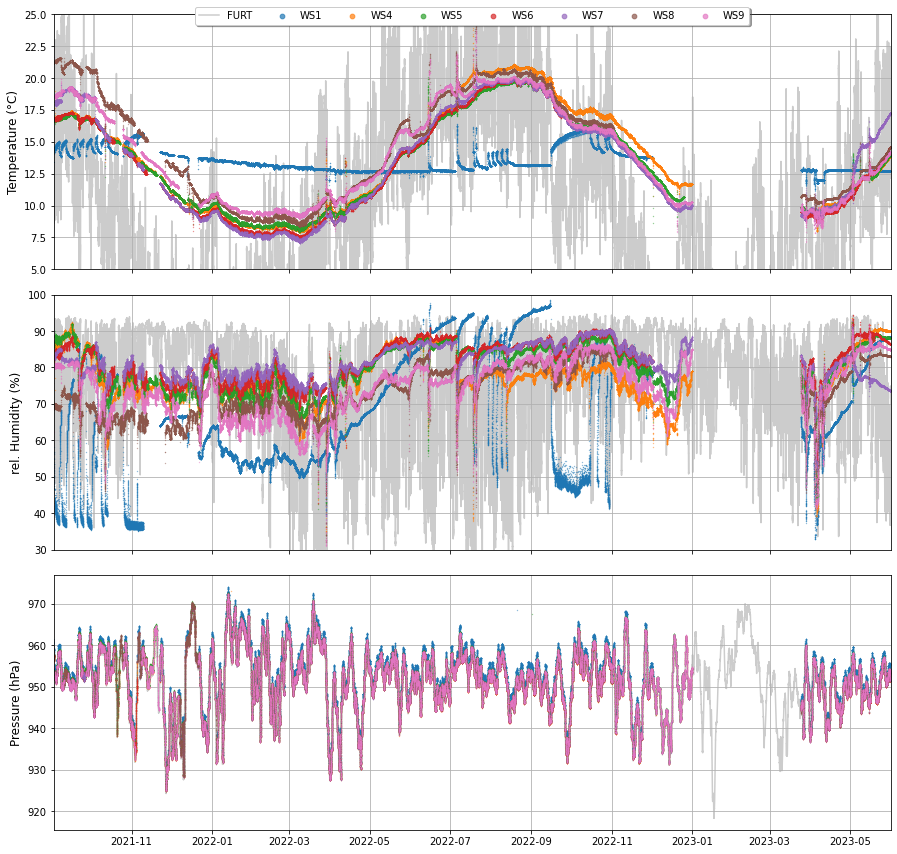

In [16]:
def __makeplot_overview(config, dfs, furt=None):
    
    NN = 3
    font = 12
    
    fig, ax = plt.subplots(NN,1, figsize=(15,15), sharex=True)
    plt.subplots_adjust(hspace=0.1)
    
    for n, df in enumerate(dfs):

#         xx = (df['totalSeconds'] - df['totalSeconds'][0])/86400
        xx = (df['TimeStamp'])

        ax[0].scatter(xx, df['Temperature (°C)'], s=.1, alpha=0.7, zorder=2, label=config['stations'][n])    
        ax[1].scatter(xx, df['rel. Humidity (%)'], s=.1, alpha=0.7, zorder=2)
        ax[2].scatter(xx, df['Pressure (hPa)'], s=.1, alpha=0.7, zorder=2)
        
#         ax[0].plot(xx, df['Temperature (°C)'], zorder=2, label=config['stations'][n])    
#         ax[1].plot(xx, df['rel. Humidity (%)'], zorder=2)
#         ax[2].plot(xx, df['Pressure (hPa)'], zorder=2)

    if furt is not None:
        ax[0].plot(furt['TimeStamp'], furt['T'], zorder=1, color ="grey", alpha=0.4, label="FURT")    
        ax[1].plot(furt['TimeStamp'], furt['H'], zorder=1, color ="grey", alpha=0.4)    
        ax[2].plot(furt['TimeStamp'], furt['P'], zorder=1, color ="grey", alpha=0.4)    
        

    ax[0].set_ylabel("Temperature (°C)", fontsize=font)
    ax[1].set_ylabel("rel. Humidity (%)", fontsize=font)
    ax[2].set_ylabel("Pressure (hPa)", fontsize=font)
    
    ax[0].set_ylim(5,25)
    ax[1].set_ylim(30,100)

    for j in range(NN):
        ax[j].grid(zorder=0)
        ax[j].set_xlim(min(xx),max(xx))
    
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=9, fancybox=True, shadow=True, markerscale=15)
#     ax[NN-1].set_xlabel(f"Days from {str(df['TimeStamp'][0])[:10]}", fontsize=font)
    
    return fig

# fig = __makeplot_overview(config, ws)
fig = __makeplot_overview(config, ws, furt)

## Load Tiltmeter Data

In [17]:
def __load_local(config, seed_id):
    
    from tqdm.notebook import tqdm
    from obspy.clients.filesystem.sds import Client
    
    net, sta, loc, cha = seed_id.split(".")
    
    tbeg, tend = config['tbeg'], config['tend']

    st0 = Client(config['datapath'],fileborder_samples=1000).get_waveforms(net, sta, loc, cha, tbeg, tend)
    
    st0.merge()
    
    return st0

In [18]:
TROMY0 = Stream()

TROMY0 = __load_local(config, "BW.TROMY..MA*")
TROMY0.sort();

TROMY0.trim(config['tbeg']+1, config['tend']-1, pad=False, fill_value=nan);
TROMY0.merge();

In [19]:
ROMYT0 = Stream()

ROMYT0 = __load_local(config, "BW.ROMYT..MA*")
ROMYT0.sort();

ROMYT0.trim(config['tbeg']+1, config['tend']-1, pad=False, fill_value=nan);
ROMYT0.merge();

In [20]:
BROMY0 = Stream()

BROMY0 = __load_local(config, "BW.DROMY..LA*")
BROMY0.sort();

BROMY0.trim(config['tbeg']+1, config['tend']-1, pad=False, fill_value=nan);
BROMY0.merge();

### Correct for Offsets

In [21]:
from functions.correct_offsets import __correct_offsets

In [22]:
offset_correction = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/", "tiltmeter_steps.yml")


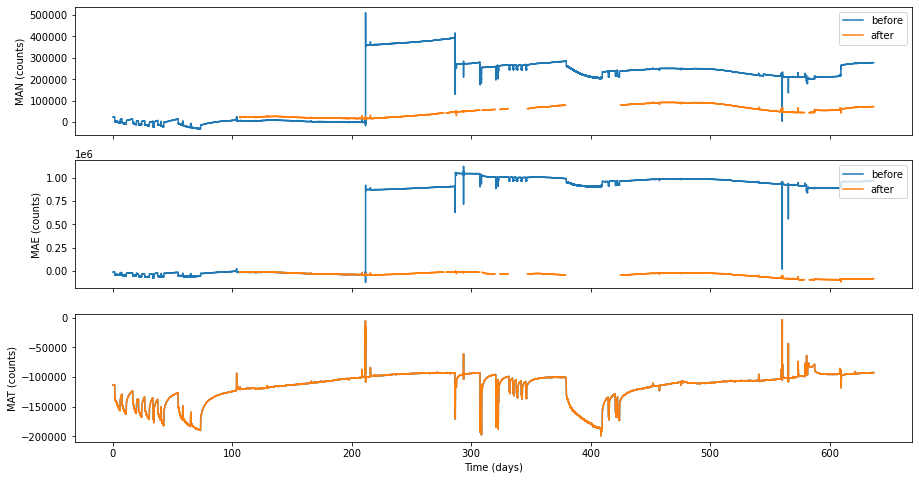

In [23]:
TROMY = __correct_offsets(TROMY0, offset_correction['TROMY'], plot=False)
ROMYT = __correct_offsets(ROMYT0, offset_correction['ROMYT'], plot=False)
BROMY = __correct_offsets(BROMY0, offset_correction['BROMY'], plot=True)

### Convert: Count to Radians

In [24]:
from functions.converstion_to_tilt import __conversion_to_tilt

In [25]:
## tiltmeter configurations
confTilt = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/","tiltmeter.conf")

## convert to radians
TROMY = __conversion_to_tilt(TROMY, confTilt['TROMY'])
ROMYT = __conversion_to_tilt(ROMYT, confTilt['ROMYT'])
BROMY = __conversion_to_tilt(BROMY, confTilt['BROMY'])

  -> converted data of TROMY
  -> converted data of ROMYT
  -> converted data of DROMY


### Flip East Component and exchange North and East Channels

In [26]:
# ROMYT_long.select(channel="*E")[0].data *= -1

# ROMYT_long.select(channel="*E")[0].stats.channel = "MAP"
# ROMYT_long.select(channel="*N")[0].stats.channel = "MAE"
# ROMYT_long.select(channel="*P")[0].stats.channel = "MAN"

### Correct for temperature drift

In [62]:
def __correct_temperature_trend(st, correction, relative=False):
    
    st0 = st.copy()
    temperature = st0.select(channel="*T")[0].data
    
    if relative: 
        temperature -= temperature[0]
    
#     st0.select(channel="*N")[0].data -= (correction['N_slope']* temperature + correction['N_intercept'])
#     st0.select(channel="*E")[0].data -= (correction['N_slope']* temperature + correction['N_intercept'])

    st0.select(channel="*N")[0].data -= (correction['N_slope']* temperature)
    st0.select(channel="*E")[0].data -= (correction['E_slope']* temperature)   
    
    return st0

In [72]:
ROMYR = ROMYT.split().merge(fill_value="interpolate")
TROMY = TROMY.split().merge(fill_value="interpolate")
BROMY = BROMY.split().merge(fill_value="interpolate")

In [109]:
TROMY_tc = __correct_temperature_trend(TROMY, temperature_correction['TROMY'], relative=True)
ROMYT_tc = __correct_temperature_trend(ROMYT, temperature_correction['ROMYT'], relative=True)
# BROMY_tc = __correct_temperature_trend(BROMY, temperature_correction['ROMYT'], relative=True)
BROMY_tc = BROMY

In [110]:
## Reset start to Zero
for st in [TROMY,ROMYT,BROMY,TROMY_tc,ROMYT_tc,BROMY_tc]:
    for tr in st:
        if not tr.stats.channel[-1] == "T" or tr.stats.channel[0] == "W":
            tr.data = tr.data - np.nanmean(np.array(tr.data[:10]))

In [111]:
BROMY_tc.split().merge(fill_value="interpolate")

3 Trace(s) in Stream:
BW.DROMY..LAE | 2021-09-01T00:10:00.000000Z - 2023-05-30T23:50:00.000000Z | 600.0 s, 91727 samples
BW.DROMY..LAN | 2021-09-01T00:10:00.000000Z - 2023-05-30T23:50:00.000000Z | 600.0 s, 91727 samples
BW.DROMY..LAT | 2021-09-01T00:10:00.000000Z - 2023-05-30T23:50:00.000000Z | 600.0 s, 91727 samples

## Plotting

In [112]:
def __makeplot_overview_tilt(config, dfs, tromy, romyt, bromy=None, furt=None):
    
    from datetime import datetime
    
    NN = 4
    font = 12
    
    scaling_tilt = 1e6 # micro rad
    tilt_unit = r"$\mu$rad"
    
    ## ____________________
    ##
    fig, ax = plt.subplots(NN, 1, figsize=(15,15), sharex=True)
    plt.subplots_adjust(hspace=0.1)
    
    for n, df in enumerate(dfs):
        xx = df['totalSeconds']
#         xx = (df['totalSeconds'] - df['totalSeconds'][0])/86400
#         xx = (df['TimeStamp'])

        ax[0].scatter(xx, df['Temperature (°C)'], s=.1, zorder=2, label=config['stations'][n])    
        ax[1].scatter(xx, df['rel. Humidity (%)'], s=.1, zorder=2)
        ax[2].scatter(xx, df['Pressure (hPa)'], s=.1, zorder=2)

#         ax[0].plot(xx, df['Temperature (°C)'], zorder=2, label=config['stations'][n])    
#         ax[1].plot(xx, df['rel. Humidity (%)'], zorder=2)
#         ax[2].plot(xx, df['Pressure (hPa)'], zorder=2)

    if furt is not None:
#         ax[0].plot(furt['TimeStamp'], furt['T'], zorder=1, color ="grey", alpha=0.4, label="FURT")    
#         ax[1].plot(furt['TimeStamp'], furt['H'], zorder=1, color ="grey", alpha=0.4)    
#         ax[2].plot(furt['TimeStamp'], furt['P'], zorder=1, color ="grey", alpha=0.4)    
        ax[0].plot(furt['totalSeconds'], furt['T'], zorder=1, color ="grey", alpha=0.4, label="FURT")    
        ax[1].plot(furt['totalSeconds'], furt['H'], zorder=1, color ="grey", alpha=0.4)    
        ax[2].plot(furt['totalSeconds'], furt['P'], zorder=1, color ="grey", alpha=0.4)    
        
        ## plot rain
        axes_rain = ax[2].twinx()
        axes_rain.fill_between(furt['totalSeconds'], 0, furt['Rc'], alpha=1)
        axes_rain.set_ylim(bottom=0)
        axes_rain.set_ylabel("Percipitation (mm)")
        
        
    ## ROMYT tiltmeter
    time_N_tromy = tromy.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[3].plot(time_N_tromy, tromy.select(channel="*N")[0].data*scaling_tilt, label="TROMY N-S")
    
    time_E_tromy = tromy.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[3].plot(time_E_tromy, tromy.select(channel="*E")[0].data*scaling_tilt, label="TROMY E-W")
    
    ax[0].plot(time_N_tromy, tromy.select(channel="*T")[0].data, color='k', label="TROMY-T")
    
    
    ## TROMY tiltmeter
    time_N_romyt = romyt.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[3].plot(time_N_romyt, romyt.select(channel="*N")[0].data*scaling_tilt, label="ROMYT N-S")
    
    time_E_romyt = romyt.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[3].plot(time_E_romyt, romyt.select(channel="*E")[0].data*scaling_tilt, label="ROMYT E-W")
    
    print()
    ## Borehole tiltmeter
    if bromy is not None:
        time_N_bromy = bromy.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))
        ax[3].plot(time_N_bromy, bromy.select(channel="*N")[0].data*scaling_tilt, label="BROMY N-S")

        time_E_bromy = bromy.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))
        ax[3].plot(time_E_bromy, bromy.select(channel="*E")[0].data*scaling_tilt, label="BROMY E-W")
    

    ax[0].set_ylabel("Temperature (°C)", fontsize=font)
    ax[1].set_ylabel("rel. Humidity (%)", fontsize=font)
    ax[2].set_ylabel("Pressure (hPa)", fontsize=font)
    ax[3].set_ylabel(f"Titl ({tilt_unit})", fontsize=font)
    
    ax[0].set_ylim(0,25)
    ax[1].set_ylim(30,100)

    for j in range(NN):
        ax[j].grid(zorder=0)
        ax[j].set_xlim(min(xx),max(xx))

    tcks= ax[NN-1].get_xticks()
    tcklbls = [datetime.fromtimestamp(t+datetime(2019,1,1).timestamp()).strftime("%Y-%m-%d") for t in tcks]
    ax[NN-1].set_xticklabels(tcklbls)
        
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=10, fancybox=True, shadow=True, markerscale=15)
    
    ax[3].legend(loc="upper left")
    
    plt.show();
    return fig

# fig = __makeplot_overview_tilt(config, ws, TROMY, ROMYT, bromy=BROMY, furt=furt);

In [113]:
# __savefig(fig, outpath=config['output_figures'], outname="WROMY_OneYear_and_Tilt_NoCorrection.png", mode="png", dpi=300)

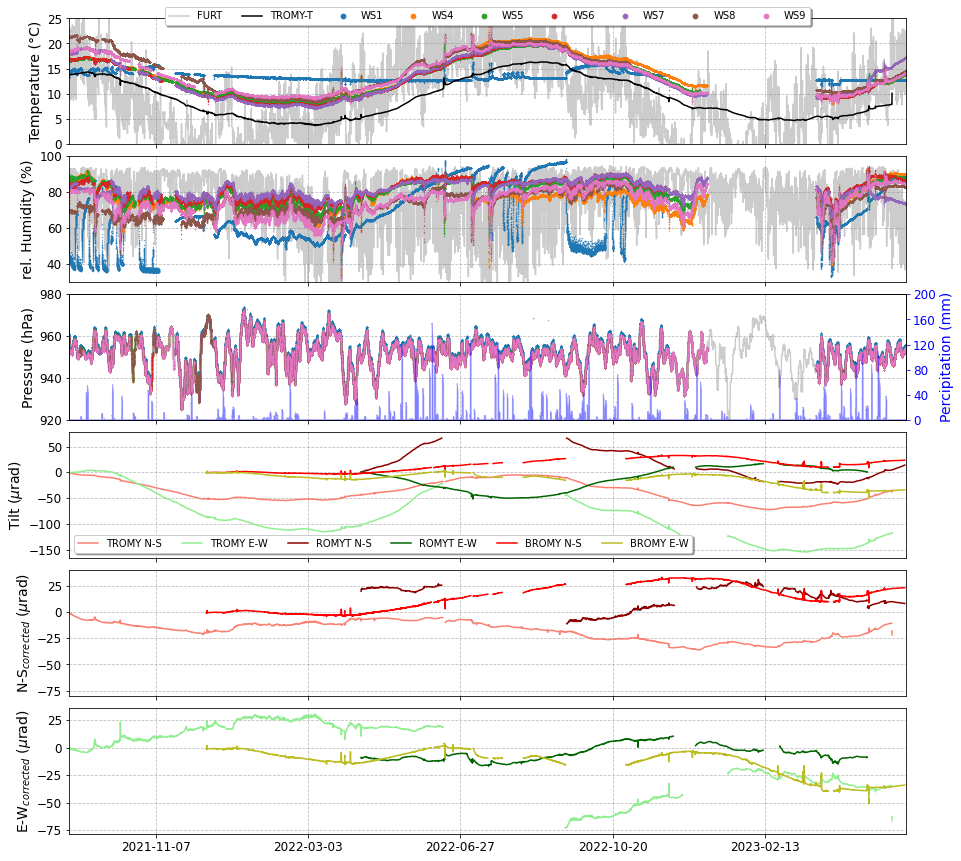

In [114]:
def __makeplot_overview_tilt(config, dfs, tromy, romyt, bromy, tromy_tc, romyt_tc, bromy_tc, furt=None):
    
    from datetime import datetime
    from numpy import linspace
    
    NN = 6
    font = 14
    
    scaling_tilt = 1e6 # micro rad
    tilt_unit = r"$\mu$rad"
    
    ## ____________________
    ##
    fig, ax = plt.subplots(NN, 1, figsize=(15,15), sharex=True)
    plt.subplots_adjust(hspace=0.1)
    
    for n, df in enumerate(dfs):
        xx = df['totalSeconds']
#         xx = (df['totalSeconds'] - df['totalSeconds'][0])/86400
#         xx = (df['TimeStamp'])

        ax[0].scatter(xx, df['Temperature (°C)'], s=.1, zorder=2, label=config['stations'][n])    
        ax[1].scatter(xx, df['rel. Humidity (%)'], s=.1, zorder=2)
        ax[2].scatter(xx, df['Pressure (hPa)'], s=.1, zorder=2)

#         ax[0].plot(xx, df['Temperature (°C)'], zorder=2, label=config['stations'][n])    
#         ax[1].plot(xx, df['rel. Humidity (%)'], zorder=2)
#         ax[2].plot(xx, df['Pressure (hPa)'], zorder=2)

    if furt is not None:
#         ax[0].plot(furt['TimeStamp'], furt['T'], zorder=1, color ="grey", alpha=0.4, label="FURT")    
#         ax[1].plot(furt['TimeStamp'], furt['H'], zorder=1, color ="grey", alpha=0.4)    
#         ax[2].plot(furt['TimeStamp'], furt['P'], zorder=1, color ="grey", alpha=0.4)    
        ax[0].plot(furt['totalSeconds'], furt['T'], zorder=1, color ="grey", alpha=0.4, label="FURT")    
        ax[1].plot(furt['totalSeconds'], furt['H'], zorder=1, color ="grey", alpha=0.4)    
        ax[2].plot(furt['totalSeconds'], furt['P'], zorder=1, color ="grey", alpha=0.4)    
        
        ## plot rain
        axes_rain = ax[2].twinx()
#         axes_rain.fill_between(furt['totalSeconds'], 0, furt['Rc'], alpha=1)
        axes_rain.fill_between(furt['totalSeconds'], 0, furt['Rc'].rolling(5).sum(), alpha=0.3, color="blue") ## cumlative sum
        axes_rain.set_ylim(bottom=0)
        axes_rain.set_ylabel("Percipitation (mm)", fontsize=font, color="blue")
        axes_rain.tick_params(axis="y", colors="blue")
        axes_rain.set_yticks(linspace(axes_rain.get_yticks()[0], axes_rain.get_yticks()[-1], len(ax[2].get_yticks())+1))
        axes_rain.tick_params(labelsize=font-2)   

    ## TROMY tiltmeter
    time_N_tromy = tromy.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[3].plot(time_N_tromy, tromy.select(channel="*N")[0].data*scaling_tilt, label="TROMY N-S", color="salmon")
    
    time_E_tromy = tromy.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[3].plot(time_E_tromy, tromy.select(channel="*E")[0].data*scaling_tilt, label="TROMY E-W", color="lightgreen")
    
    ## ROMYT tiltmeter
    time_N_romyt = romyt.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[3].plot(time_N_romyt, romyt.select(channel="*N")[0].data*scaling_tilt, label="ROMYT N-S", color="darkred")
    
    time_E_romyt = romyt.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[3].plot(time_E_romyt, romyt.select(channel="*E")[0].data*scaling_tilt, label="ROMYT E-W", color="darkgreen")
    
    ## Borehole tiltmeter
    time_N_bromy = bromy.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[3].plot(time_N_bromy, bromy.select(channel="*N")[0].data*scaling_tilt, label="BROMY N-S", color="red")

    time_E_bromy = bromy.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[3].plot(time_E_bromy, bromy.select(channel="*E")[0].data*scaling_tilt, label="BROMY E-W", color="tab:olive")

        
    ## ROMYT tiltmeter
    time_N_tromy_tc = tromy_tc.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[4].plot(time_N_tromy_tc, tromy_tc.select(channel="*N")[0].data*scaling_tilt, label="TROMY N-S", color="salmon")
    
    time_E_tromy_tc = tromy_tc.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[5].plot(time_E_tromy_tc, tromy_tc.select(channel="*E")[0].data*scaling_tilt, label="TROMY E-W", color="lightgreen")
        
    
    ## TROMY tiltmeter
    time_N_romyt_tc = romyt_tc.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[4].plot(time_N_romyt_tc[15:], romyt_tc.select(channel="*N")[0].data[15:]*scaling_tilt, label="ROMYT N-S", color="darkred")
    
    time_E_romyt_tc = romyt_tc.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[5].plot(time_E_romyt_tc[15:], romyt_tc.select(channel="*E")[0].data[15:]*scaling_tilt, label="ROMYT E-W", color="darkgreen")
    
    ## Borehole tiltmeter
    time_N_bromy_tc = bromy_tc.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[4].plot(time_N_bromy_tc, bromy_tc.select(channel="*N")[0].data*scaling_tilt, label="BROMY N-S", color="red")

    time_E_bromy_tc = bromy_tc.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))
    ax[5].plot(time_E_bromy_tc, bromy_tc.select(channel="*E")[0].data*scaling_tilt, label="BROMY E-W", color="tab:olive")

    ## temperature tiltmeter
    ax[0].plot(time_N_tromy, tromy.select(channel="*T")[0].data, color='k', label="TROMY-T")
#     ax[0].plot(time_N_bromy, bromy.select(channel="*T")[0].data, color='k', label="BROMY-T")
    

    lbl = r"$_{corrected}$"
    ax[0].set_ylabel("Temperature (°C)", fontsize=font)
    ax[1].set_ylabel("rel. Humidity (%)", fontsize=font)
    ax[2].set_ylabel("Pressure (hPa)", fontsize=font)
    ax[3].set_ylabel(f"Tilt ({tilt_unit})", fontsize=font)
    ax[4].set_ylabel(f"N-S{lbl} ({tilt_unit})", fontsize=font)
    ax[5].set_ylabel(f"E-W{lbl} ({tilt_unit})", fontsize=font)
    
    ax[0].set_ylim(0, 25)
    ax[2].set_ylim(920, 980)
    ax[1].set_ylim(30, 100)
    ax[4].set_ylim(-80, 40)

    for j in range(NN):
        ax[j].grid(zorder=0, ls="--", color="grey", alpha=0.5)
        ax[j].set_xlim(min(xx)-1,max(xx))
        ax[j].tick_params(labelsize=font-2)   

    tcks= ax[NN-1].get_xticks()
    tcklbls = [datetime.fromtimestamp(t+datetime(2019,1,1).timestamp()).strftime("%Y-%m-%d") for t in tcks]
    ax[NN-1].set_xticklabels(tcklbls)
        
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=10, fancybox=True, shadow=True, markerscale=15)
    
#     ax[5].legend(loc="lower right", bbox_to_anchor=(1.03, 0.6), fancybox=True, shadow=True,)
    ax[3].legend(loc="lower left", ncol=6, fancybox=True, shadow=True,)

    plt.show();
    return fig

fig = __makeplot_overview_tilt(config, ws, TROMY, ROMYT, BROMY, TROMY_tc, ROMYT_tc, BROMY_tc, furt=furt);

In [71]:
__savefig(fig, outpath=config['output_figures'], outname="WROMY_all_and_Tilt", mode="png", dpi=300)


   -> saving /home/brotzer/Documents/ROMY/WROMY/figures/WROMY_all_and_Tilt.png ...

   -> Done



## Plot Temperature vs. Tilt for long timeseries

In [146]:
from numpy import linspace

tt1, tt2 = min(BROMY.select(channel="*T")[0].data), max(BROMY.select(channel="*T")[0].data)
bromy_temp = linspace(tt1,tt2,200)
bromy_lin_e = temperature_correction['BROMY']['E_slope'] * bromy_temp +1500e-6
bromy_lin_n = temperature_correction['BROMY']['N_slope'] * bromy_temp +1500e-6

tt1, tt2 = min(TROMY.select(channel="*T")[0].data), max(TROMY.select(channel="*T")[0].data)
tromy_temp = linspace(tt1,tt2,200)
tromy_lin_e = temperature_correction['TROMY']['E_slope'] * tromy_temp -200e-6
tromy_lin_n = temperature_correction['TROMY']['N_slope'] * tromy_temp -80e-6

tt1, tt2 = min(ROMYT.select(channel="*T")[0].data), max(ROMYT.select(channel="*T")[0].data)
romyt_temp = linspace(tt1,tt2,200)
romyt_lin_e = temperature_correction['ROMYT']['E_slope'] * romyt_temp +60e-6
romyt_lin_n = temperature_correction['ROMYT']['N_slope'] * romyt_temp -140e-6


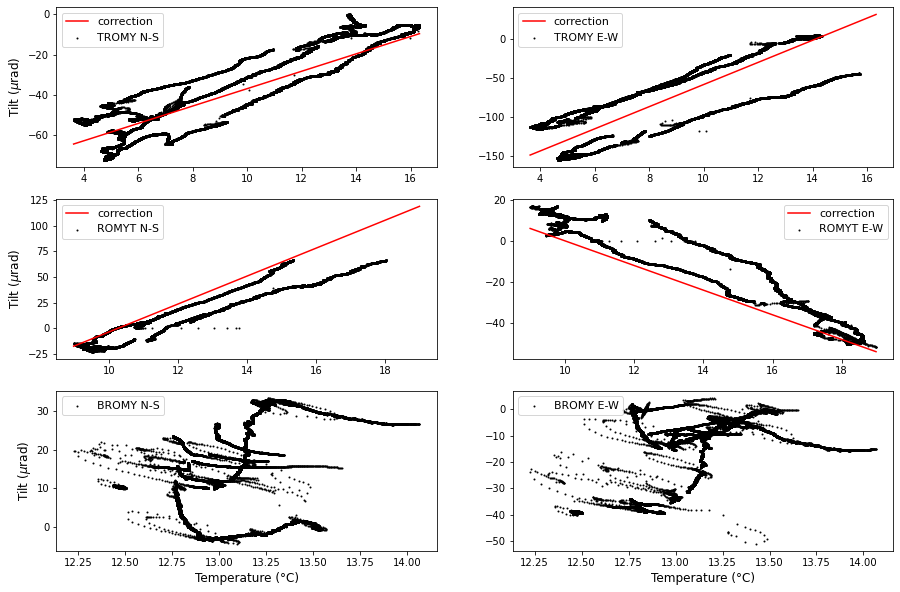

In [148]:
bromy_lin = temperature_correction['BROMY']['E_slope']


fig, ax = plt.subplots(3,2, figsize=(15,10))

font = 12
ts = 1e6

ax[0,0].scatter(TROMY.select(channel="*T")[0].data, TROMY.select(channel="*N")[0].data*ts, s=1, color="k", label="TROMY N-S")
ax[0,1].scatter(TROMY.select(channel="*T")[0].data, TROMY.select(channel="*E")[0].data*ts, s=1, color="k", label="TROMY E-W")

ax[1,0].scatter(ROMYT.select(channel="*T")[0].data, ROMYT.select(channel="*N")[0].data*ts, s=1, color="k", label="ROMYT N-S")
ax[1,1].scatter(ROMYT.select(channel="*T")[0].data, ROMYT.select(channel="*E")[0].data*ts, s=1, color="k", label="ROMYT E-W")

ax[2,0].scatter(BROMY.select(channel="*T")[0].data, BROMY.select(channel="*N")[0].data*ts, s=1, color="k", label="BROMY N-S")
ax[2,1].scatter(BROMY.select(channel="*T")[0].data, BROMY.select(channel="*E")[0].data*ts, s=1, color="k", label="BROMY E-W")

ax[0,1].plot(tromy_temp, tromy_lin_e*ts, color="red", label="correction")
ax[1,1].plot(romyt_temp, romyt_lin_e*ts, color="red", label="correction")
# ax[2,1].plot(bromy_temp, bromy_lin_e*ts, color="red", label="correction")

ax[0,0].plot(tromy_temp, tromy_lin_n*ts, color="red", label="correction")
ax[1,0].plot(romyt_temp, romyt_lin_n*ts, color="red", label="correction")
# ax[2,0].plot(bromy_temp, bromy_lin_n*ts, color="red", label="correction")

for i in range(3):
    for j in range(2):
        ax[i,j].legend(fontsize=font-1)


ax[0,0].set_ylabel(f"Tilt ($\mu$rad)", fontsize=font)
ax[1,0].set_ylabel(f"Tilt ($\mu$rad)", fontsize=font) 
ax[2,0].set_ylabel(f"Tilt ($\mu$rad)", fontsize=font)

ax[2,0].set_xlabel("Temperature (°C)", fontsize=font)
ax[2,1].set_xlabel("Temperature (°C)", fontsize=font)
        
plt.show();

## Other Plot

In [37]:
dfs = ws.copy()

for n, df in enumerate(dfs): 
    df.dropna(inplace=True)
    df.sort_values('totalSeconds', inplace=True)
    dfs[n] = df

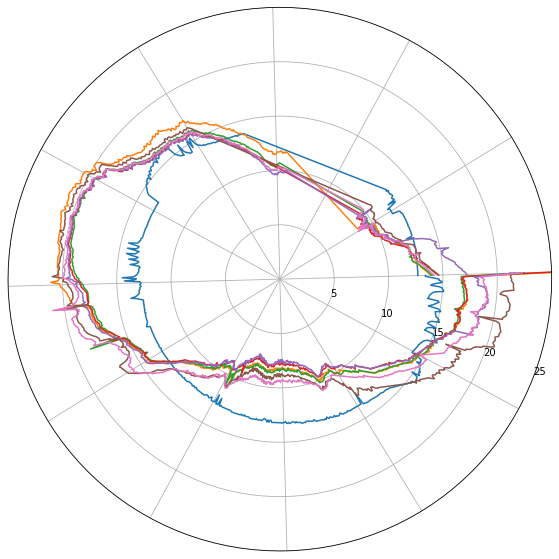

In [38]:
from numpy import pi


def __norm_to_2pi(data):
    return (data-min(data))*2*pi/max(data-min(data))

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='polar')

for df in dfs:

    xx = __norm_to_2pi(df['totalSeconds'][::100])

    ax.plot(xx, df['Temperature (°C)'][::100])

ax.set_theta_direction(-1)
ax.set_theta_offset(pi/2.0)

ax.set_xticks(np.linspace(0, 2*pi, 12, endpoint=False))
ax.set_xticklabels(['' for i in range(12)])
# ax.set_yticks((0.300,0.350,0.400,0.450,0.500,0.550,0.600))
ax.set_ylim([0,25])
# ax.set_yticklabels(('300','350','400','450','500','550','600'))

ax.set_theta_zero_location("E", offset=1.5)

plt.show();